###Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

##1) Delivery_time -> Predict delivery time using sorting time

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Figure Properties
# rcParams : Runtime Configuration Parameters
plt.rcParams['figure.figsize']=(9,6)
plt.rcParams['figure.dpi']=100
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("/content/delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [39]:
# change column names
df.rename(columns={'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'}, inplace=True)
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


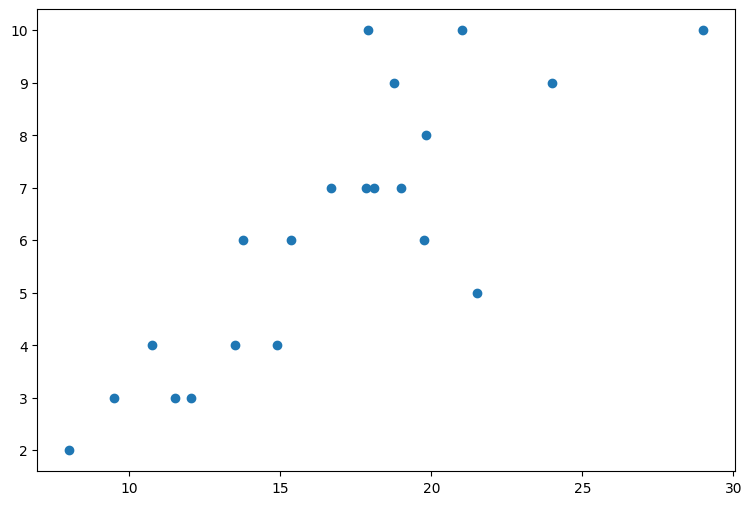

In [40]:
plt.scatter(df['DeliveryTime'],df['SortingTime'])

In [41]:
# to check the correlation between the columns
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [42]:
# to check if any null entries
df.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

<Axes: >

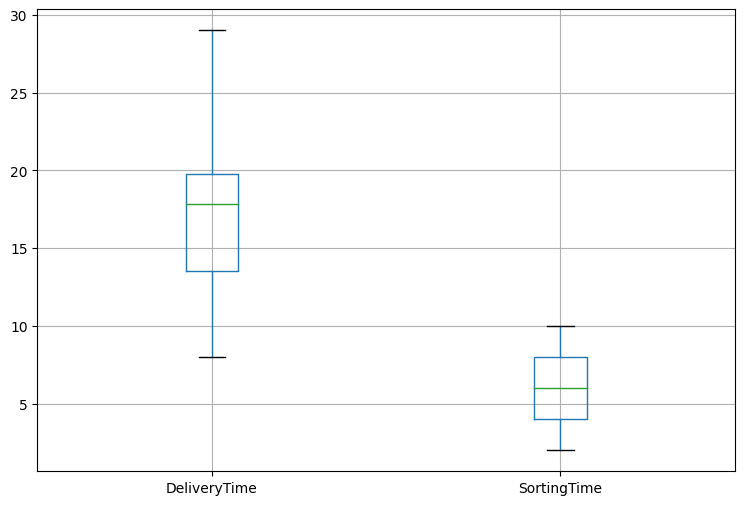

In [43]:
#to check outliers
df.boxplot()

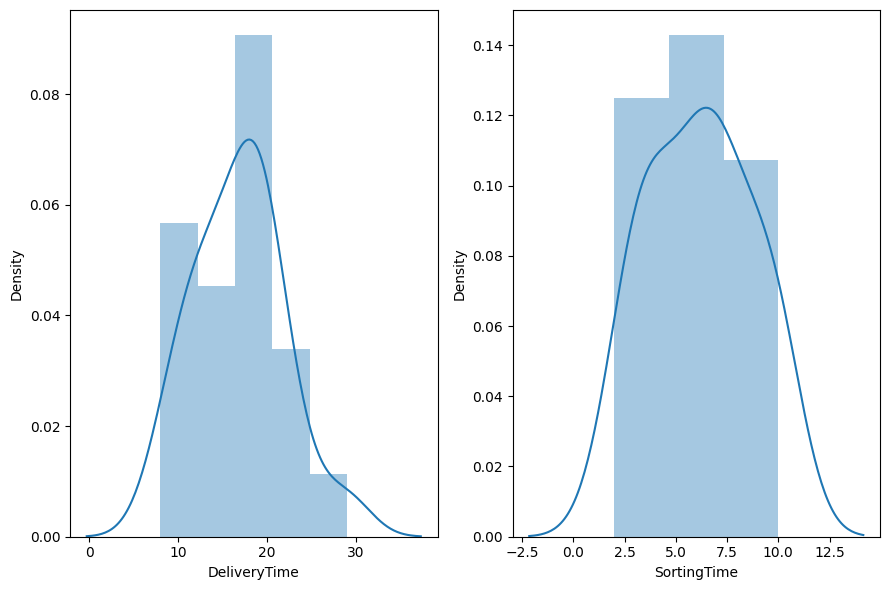

In [44]:
# to check skewness
plt.subplot(1,2,1)
sns.distplot(df['DeliveryTime'])

plt.subplot(1,2,2)
sns.distplot(df['SortingTime'])

plt.tight_layout()

In [45]:
# @title Without any Transformation
import statsmodels.formula.api as smf
model1 = smf.ols('DeliveryTime~SortingTime',data=df).fit()
model1
print('Parameters:')
print(model1.params)
print()

print('P-values:')
print(model1.pvalues)
print()

#r2 value
print('R-Squared = ',model1.rsquared)
print()

print('R-Squared Adjusted = ',model1.rsquared_adj)

Parameters:
Intercept      6.582734
SortingTime    1.649020
dtype: float64

P-values:
Intercept      0.001147
SortingTime    0.000004
dtype: float64

R-Squared =  0.6822714748417231

R-Squared Adjusted =  0.6655489208860244


In [46]:
# @title Log Transformation

df['log_sorting_time'] = np.log(df['SortingTime'])

model2 = smf.ols('DeliveryTime~log_sorting_time',data=df).fit()
model2
print('Parameters:')
print(model2.params)
print()

print('P-values:')
print(model2.pvalues)
print()

#r2 value
print('R-Squared = ',model2.rsquared)
print()

print('R-Squared Adjusted = ',model2.rsquared_adj)

Parameters:
Intercept           1.159684
log_sorting_time    9.043413
dtype: float64

P-values:
Intercept           0.641980
log_sorting_time    0.000003
dtype: float64

R-Squared =  0.6954434611324223

R-Squared Adjusted =  0.6794141696130761


In [47]:
# @title Squareroot Transformation

df['sqrt_sorting_time'] = np.sqrt(df['SortingTime'])

model3 = smf.ols('DeliveryTime~sqrt_sorting_time',data=df).fit()

print('Parameters:')
print(model3.params)
print()

print('P-values:')
print(model3.pvalues)
print()

#r2 value
print('R-Squared = ',model3.rsquared)
print()

print('R-Squared Adjusted = ',model3.rsquared_adj)

Parameters:
Intercept           -2.518837
sqrt_sorting_time    7.936591
dtype: float64

P-values:
Intercept            0.410857
sqrt_sorting_time    0.000003
dtype: float64

R-Squared =  0.695806227630867

R-Squared Adjusted =  0.6797960290851232


##Conclusion:R-Squared and Adjusted R-Squared values of Squareroot transformation better, hence best model is model3 with squareroot transformation.

In [54]:
test = pd.DataFrame({'sqrt_sorting_time' : [10.4,15.2,8.50,6.54,7.5]})
print(test)
print()
print('Predicted time by model3')
print(model3.predict(test))

   sqrt_sorting_time
0              10.40
1              15.20
2               8.50
3               6.54
4               7.50

Predicted time by model3
0     80.021707
1    118.117343
2     64.942185
3     49.386467
4     57.005594
dtype: float64


##2) Salary_hike -> Build a prediction model for Salary_hike

In [70]:
df = pd.read_csv("/content/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [71]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


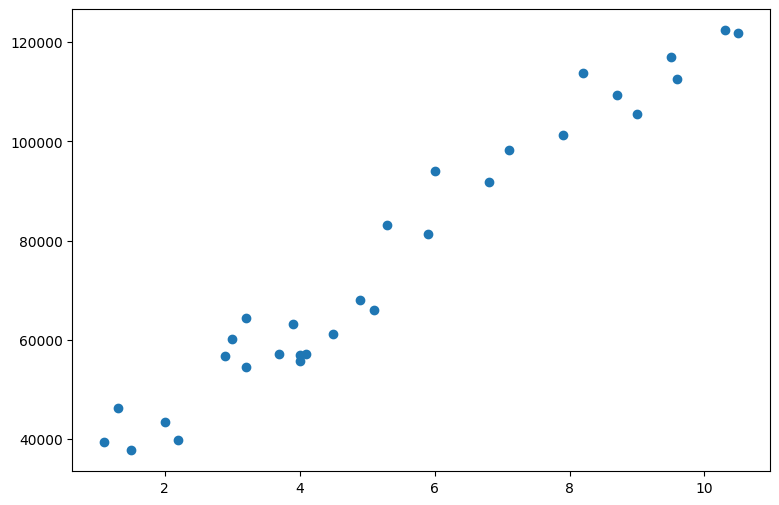

In [73]:
plt.scatter(df[df.columns[0]],df[df.columns[1]])

In [74]:
# to check the correlation between the columns
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [75]:
# to check if any null entries
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

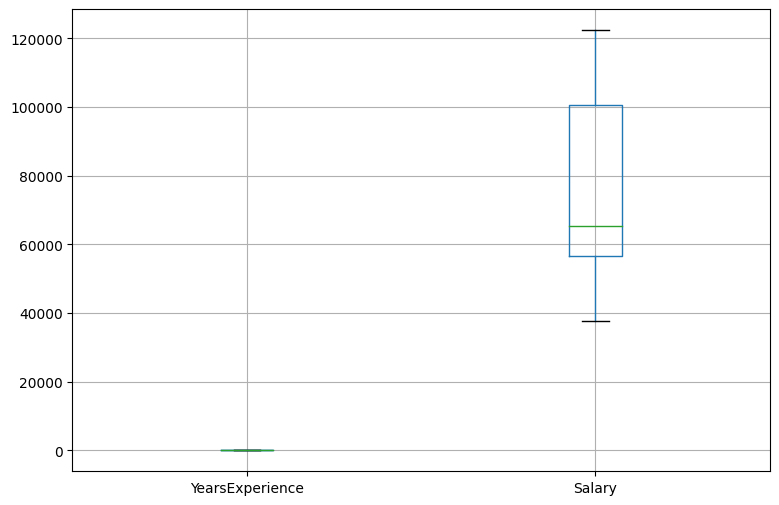

In [76]:
#to check outliers
df.boxplot()

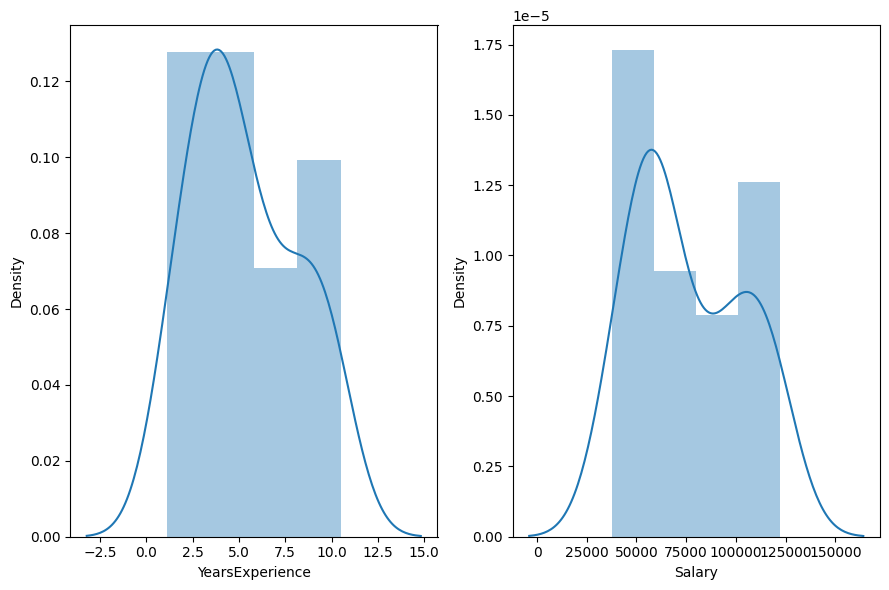

In [77]:
# to check skewness
plt.subplot(1,2,1)
sns.distplot(df[df.columns[0]])

plt.subplot(1,2,2)
sns.distplot(df[df.columns[1]])

plt.tight_layout()

In [79]:
# @title Without any Transformation
import statsmodels.formula.api as smf
model1 = smf.ols(df.columns[1]+'~'+df.columns[0],data=df).fit()
model1
print('Parameters:')
print(model1.params)
print()

print('P-values:')
print(model1.pvalues)
print()

#r2 value
print('R-Squared = ',model1.rsquared)
print()

print('R-Squared Adjusted = ',model1.rsquared_adj)

Parameters:
Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

P-values:
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

R-Squared =  0.9569566641435086

R-Squared Adjusted =  0.9554194021486339


In [81]:
# @title Log Transformation

df['logYearsExperience'] = np.log(df['YearsExperience'])

model2 = smf.ols('Salary~logYearsExperience',data=df).fit()
model2
print('Parameters:')
print(model2.params)
print()

print('P-values:')
print(model2.pvalues)
print()

#r2 value
print('R-Squared = ',model2.rsquared)
print()

print('R-Squared Adjusted = ',model2.rsquared_adj)

Parameters:
Intercept             14927.97177
logYearsExperience    40581.98796
dtype: float64

P-values:
Intercept             7.268813e-03
logYearsExperience    3.250155e-13
dtype: float64

R-Squared =  0.8538888828756969

R-Squared Adjusted =  0.8486706286926861


In [82]:
# @title Squareroot Transformation

df['sqrtYearsExperience'] = np.sqrt(df['YearsExperience'])

model3 = smf.ols('Salary~sqrtYearsExperience',data=df).fit()

print('Parameters:')
print(model3.params)
print()

print('P-values:')
print(model3.pvalues)
print()

#r2 value
print('R-Squared = ',model3.rsquared)
print()

print('R-Squared Adjusted = ',model3.rsquared_adj)

Parameters:
Intercept             -16055.769117
sqrtYearsExperience    41500.680583
dtype: float64

P-values:
Intercept              2.906965e-03
sqrtYearsExperience    8.565358e-18
dtype: float64

R-Squared =  0.9310009544993526

R-Squared Adjusted =  0.9285367028743294


##Conclusion:Regular model without any transformation is better

In [84]:
test = pd.DataFrame({'YearsExperience' : [10,20,30,40,50]})
print(test)
print()
print('Predicted Salary by model1')
print(model1.predict(test))

   YearsExperience
0               10
1               20
2               30
3               40
4               50

Predicted Salary by model1
0    120291.823413
1    214791.446628
2    309291.069842
3    403790.693057
4    498290.316271
dtype: float64
